# Basics of logistic Regression

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snc
import statsmodels.api as sm
snc.set()

In [29]:
raw_data = pd.read_csv('/home/rshubham/STUDY/udemy_ml/Section-36/S36_L236/2.01. Admittance.csv')

In [30]:
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [31]:
raw_data['Admitted'] = raw_data['Admitted'].map({'No': 0, 'Yes': 1})

In [32]:
data = raw_data

In [33]:
y = data['Admitted']
x1 = data['SAT']

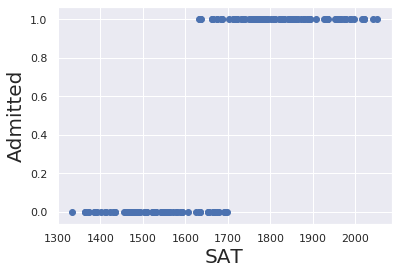

In [35]:
plt.scatter(x1, y)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

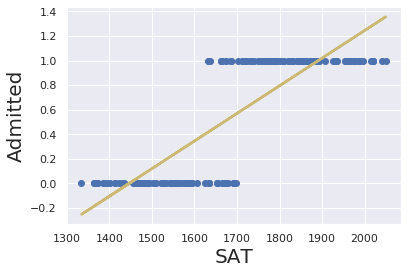

In [36]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()
plt.scatter(x1 , y , color = 'C0')
y_hat = x1*results_lin.params[1]+results_lin.params[0]
plt.plot(x1, y_hat, lw = 2.5, color = 'C8')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


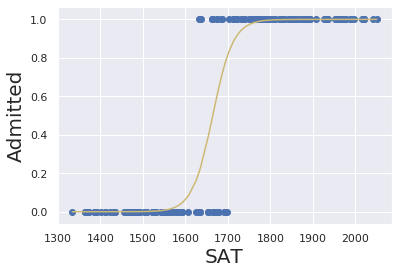

In [26]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)/(1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,c='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,c='C8')
plt.show()

In [38]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sun, 24 May 2020   Pseudo R-squ.:                  0.7992
Time:                        16:10:03   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""